# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [2]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Выводить характеристики вероятностных распределений (мат. ожидание, дисперсия) не требуется.

### Решение 

Чтобы получить оценку параметра методом моментов, необходимо приравнять эмпирические и теоретические моменты.

* **Равномерное распределение**
  
  Теоретические моменты - это мат. ожидание, $EX = \frac{a + b}{2}$, и дисперсия, $DX = \frac{(b-a)^2}{12}$
  
    Эмпирические моменты $\overline{X_1} = \frac{1}{n} \sum_{i}{X_i}$ и $\overline{X_2} = \frac{1}{n} \sum_{i}{(X_i - \frac{1}{n} \sum_{i}{X_i})^2}$

    Получаем оценку, приравнивая их: $EX = \overline{X_1}$ и $DX = \overline{X_2}$. 

    $\overline{a} = \frac{2}{n} \sum_{i}{X_i} - \overline{b}$

    $\overline{b} = \frac{1}{n} \sum_{i}{X_i} + \frac{\sqrt{3}}{2} \sqrt{\frac{1}{n} \sum_{i}{(X_i - \frac{1}{n} \sum_{i}{X_i})^2}} $

* **Пуассоновское распределение**

    Аналогично, $EX = a$, $\overline{X_1} = \frac{1}{n} \sum_{i}{X_i}$, поэтому полученная оценка $\overline{a} = \frac{1}{n} \sum_{i}{X_i}$

* **Нормальное распределение**

    Аналогично, $EX = a$, $DX = \sigma^2$, отсюда полученная оценка:
    
    $\overline{a} = \frac{1}{n} \sum_{i}{X_i}$

    $\overline{\sigma} = \sqrt{\frac{1}{n} \sum_{i}{(X_i - \frac{1}{n} \sum_{i}{X_i})^2}}$ 


---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство, используя известные вам теоретические утверждения.

---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.


## Решение

**а)** Из задания 1 получаем, что $\overline{X} = \frac{1}{n} \sum_{i}{X_i}$. Тогда получаем, что 

$$S^2 = \overline{X^2} - \overline{X}^2 = \frac{1}{n} \sum_{i}{X_i^2} - \frac{1}{n^2} (\sum_{i}{X_i})^2$$

$$S^2 = \frac{n \sum_{i}{X_i^2 - (\sum_{i}{X_i})^2}}{n^2} = \frac{n \sum_{k=1}^n X_i^2 - 2n \overline{X}(\sum_{k=1}^n X_i) + n^2 \overline{X}^2}{n^2}$$

$$S^2=\frac{1}{n} \sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$$

**b)** Посчитаем мат. ожидание величины $S^2$, используя независимость величин $X_i$.  

$ES^2 = E\overline{X^2} - E(\overline{X})^2$ = ...тяжелые для теха вычисления... =  $EX^2 - \frac{1}{n} EX^2 = (1 - \frac{1}{n}) \sigma^2$. Статистика $S^2$ не является несмещенной оценкой.

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Согласно результатам задачи 3 оценка $S^2$ не является несмещённой. Аналогично, исходя из того, что $ES^2 = (1 - \frac{1}{n}) \sigma^2$, оценка $\frac{n}{n-1}S^2$ несмещённая.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture2_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`, отправляя также html-версию графика.

**Решение:**

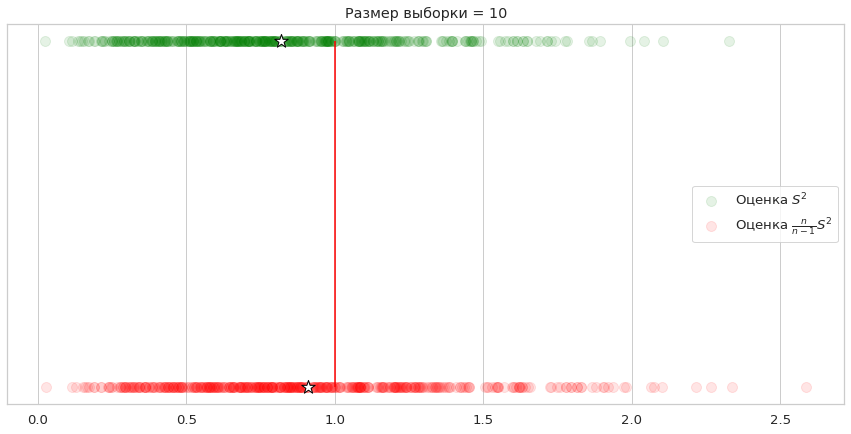

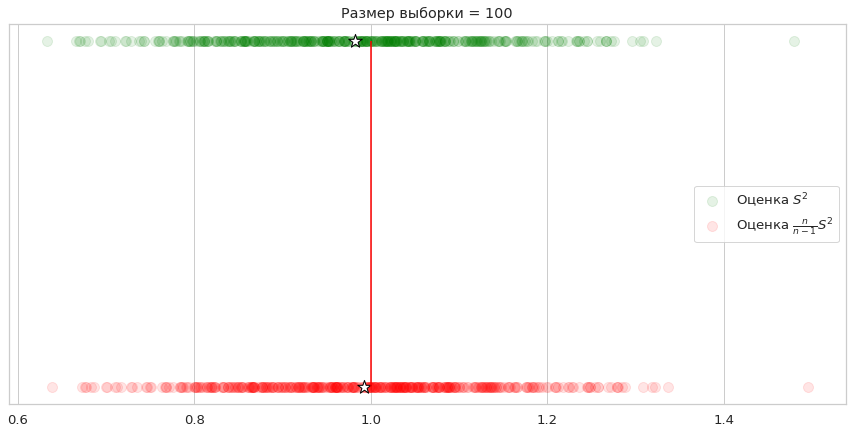

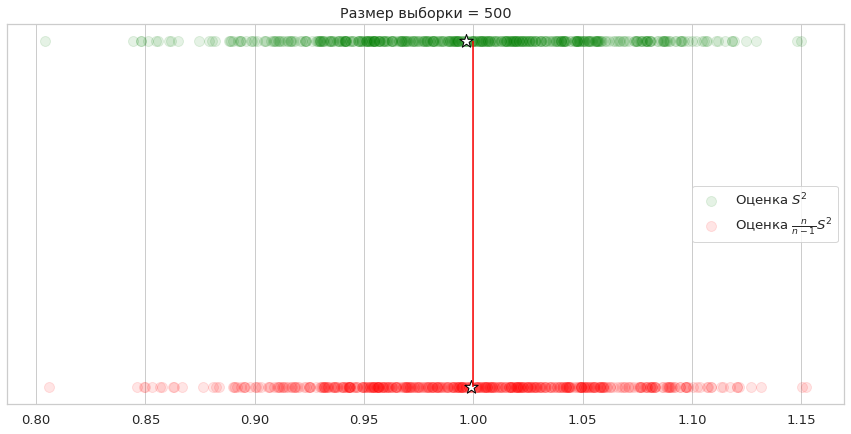

In [4]:
n = [10, 100, 500] # размер выборки
k = 500 # количество выборок
sigma = 1

k = int(0.9*k)
for size in n:

    samples = np.random.normal(loc=0, scale=sigma, size=(k, size))

    plt.figure(figsize=(15, 7))

    # Векторы оценок
    sigma_counted = []
    mean_sigma_counted = []
    
    # Посчитаем оценки
    for i in range(k):
        spec = 0
        for j in range(size - 1):
            spec += pow((samples[i][j] - 1/size * sum(samples[i])), 2)

        sigma_counted.append(spec/size) #nice sigma
        mean_sigma_counted.append(spec/(size-1)) #nice sigma

    #Уберем выбросы
    # del sigma_counted[-len(sigma_counted):]
    # del mean_sigma_counted[-len(sigma_counted):]

    
    
    # Для каждой оценки:
    # y - номер оценки
    plt.scatter(sigma_counted , np.zeros(k) + 1, 
                alpha=0.1, s=100, color='green', label=r'Оценка $S^2$')
    plt.scatter(np.mean(sigma_counted), 1 , marker='*', s=200, 
               color='w', edgecolors='black')
    
    plt.scatter(mean_sigma_counted , np.zeros(k), 
                alpha=0.1, s=100, color='red', label=r'Оценка $\frac{n}{n-1} S^2$')
    plt.scatter(np.mean(mean_sigma_counted), 0 , marker='*', s=200, 
               color='w', edgecolors='black')


    # Для всего графика:
    plt.vlines(1, 0, 1, color='r')
    plt.title(f'Размер выборки = {size}')
    plt.yticks([])
    plt.legend()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

**Решение:**

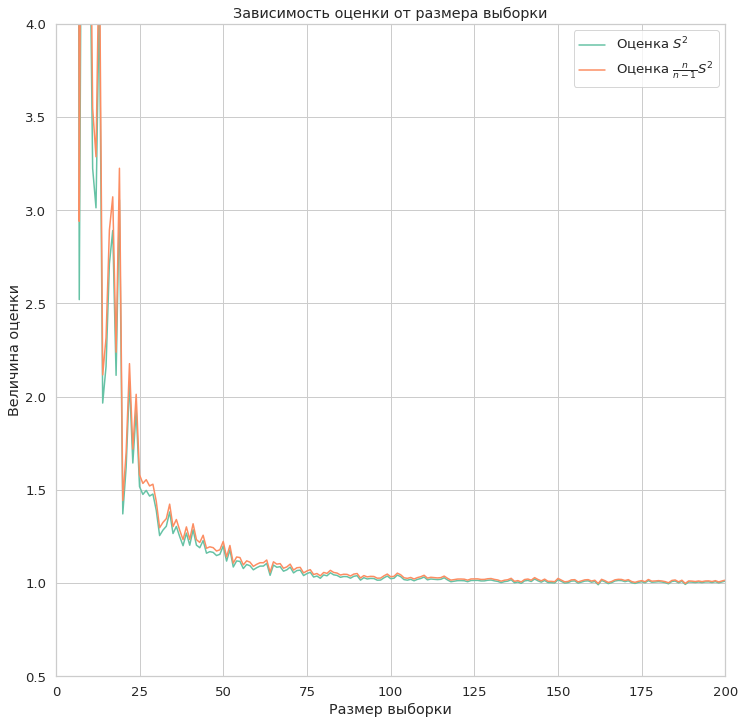

In [70]:
sigma_counted = []    
mean_sigma_counted = []
size = list(range(2, 501))
S = []

for i in size:
    samples = np.random.normal(loc=0, scale=sigma, size=(k, i))
    result = np.mean(pow(samples - (1/i * sum(samples)), 2))
    sigma_counted.append(result)
    mean_sigma_counted.append(i*result/(i-1))

#Построим график
plt.figure(figsize=(12, 12))
plt.plot(size, sigma_counted, label=r'Оценка $S^2$')
plt.plot(size, mean_sigma_counted, label=r'Оценка $\frac{n}{n-1} S^2$')

plt.ylim(0.5, 4)
plt.xlim(0, 200)
plt.xlabel('Размер выборки')
plt.ylabel('Величина оценки')
plt.title("Зависимость оценки от размера выборки")
plt.legend()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** 

Свойство несмещенности оценки означает, что математическое ожидание оценки равно истинному значению оцениваемой величины. Если оценка смещена, то ее математическое ожидание отличается от истинного значения оцениваемой величины.

Результаты экспериментов подтверждаются по графикам, особенно по последнему, где можно наблюдать, как оценки смещены или несмещены в зависимости от используемой формулы. Подтверждаются выводы о свойствах несмещенности (используя $\frac{n}{n-1} S^2$) и смещенности (используя $S^2$) данных оценок. Становится очевидным, что при увеличении размера выборки оценки становятся все более похожими, что связано со стремлением значения  $\frac{n}{n-1}$ к 1.

В лабораторных работах по физике это связано с тем, что оценка погрешности на основе выборочной дисперсии может быть смещенной, то есть ее математическое ожидание может отличаться от истинного значения погрешности. Использование формулы с (n-1) в знаменателе позволяет учитывать этот факт и получать более точные оценки.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.